# Домашнее задание №1


Задание присылать на обе почты почты **aleksartamonov@gmail.com**  **dashkov.alexander.om@gmail.com** в виде ссылки на colab

В теме письма указать ***CV_HSE_2021 HW1 <Фамилия Имя>***

soft deadline: 14.02.2021T23:59:00+0300

hard deadline: 21.02.2021T23:59:00+0300

## Теоретический блок

##### Задача 1 (3 балла)

Когда Вы заходите в темную комнату из светлого помещения, то проходит некоторое время, прежде чем Вы станете видеть достаточно хорошо, чтобы различить очертания предметов. Какая из обсуждавшихся на лекции особенностей зрительного восприятия человека объясняет это явление? Какой процесс происходит в зрительной системе?

Светочувствительная аккомодация зрения (адаптация к изменению интенсивности улавливаемого света).

Йодопсин колбочек в темноте восстанавливается быстрее родопсина палочек, поэтому в первые минуты пребывания в темноте адаптация зависит от процессов, протекающих в колбочках. Этот первый период адаптации не вызывает больших изменений чувствительности глаза в целом, так как абсолютная чувствительность колбочкового аппарата невелика.

##### Задача 2 (3 балла)

Рассмотрим некоторое цветовое пространство $R_{new}G_{new}B_{new}$, получающееся из исходного RGB по правилу:

$$
R_{new} = a_{11}R+a_{12}G+a_{13}B+a_{14}\\
G_{new} = a_{21}R+a_{22}G+a_{23}B+a_{24}\\
B_{new} = a_{31}R+a_{32}G+a_{33}B+a_{34}
$$

где R, G и B – вещественные числа от 0 до 1. 

Какими свойствами должны обладать коэффициенты $a_{ij}$, чтобы можно было без потерь информации переходить из одного пространства в другое и обратно?
(*) Какими свойствами должны обладать коэффициенты $a_{ij}$ , чтобы вещественные числа $R_{new},G_{new}$ и $B_{new}$ тоже лежали внутри куба со стороной 1 и полностью плотно его заполняли?

## Практический блок

In [1]:
import numpy as np
import cv2
from itertools import permutations
import matplotlib.pylab as plt
%matplotlib inline

##### Задача 3 (3 балла)

Загрузите изображение *lena.jpg* в переменную **lena**. Отобразите результат на экран.

In [2]:
def show_image(img, **kwargs):
    plt.axis("off")
    plt.tight_layout()
    plt.imshow(img, **kwargs)

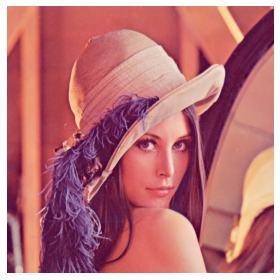

In [3]:
lena = cv2.cvtColor(cv2.imread("lena.jpg"), cv2.COLOR_BGR2RGB)
show_image(lena)

##### Задача 4 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

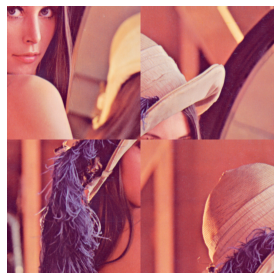

In [4]:
c = (lena.shape[0] // 2, lena.shape[1] // 2)
lena1 = lena.copy()
lena1[:c[0], :c[1], :] = lena[c[0]:, c[1]:, :]  # 2nd qtr
lena1[c[0]:, c[1]:, :] = lena[:c[0], :c[1], :]  # 4th qtr
show_image(lena1)

##### Задача 5 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**.

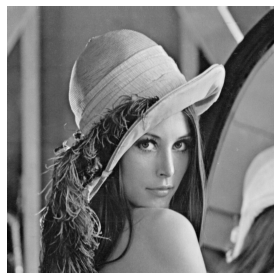

In [5]:
lena_gray_my = lena.copy()
# do not clear wether or not the image resulted should have 3 dim in color
# mean = np.mean(lena, axis=2)
# lena_gray_my[:, :, 0] = mean
# lena_gray_my[:, :, 1] = mean
# lena_gray_my[:, :, 2] = mean
lena_gray_my = np.mean(lena, axis=2)
show_image(lena_gray_my, cmap="gray")

##### Задача 6 (3 балла)

Переведите исходное цветное изображение **lena** в изображение в градациях серого с помощью функции cvtColor. (**lena_gray_cvt**). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране.

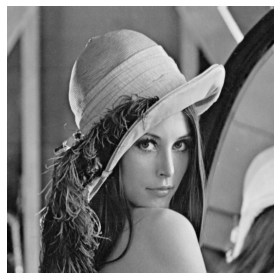

In [6]:
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)
show_image(lena_gray_cvt, cmap="gray")

На глаз, что собственная, что cvt-шная практически не отличаются

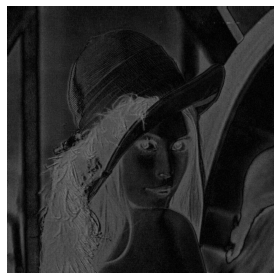

In [7]:
show_image(np.abs(lena_gray_cvt - lena_gray_my), cmap="gray")

##### Задача 7 (3 балла)

Переведите исходное изображение **lena** из RGB в HSV. Установите значения S и V в максимум для всех пикселей изображения. Полученное изображение переведите обратно в RGB. Отобразите результат.

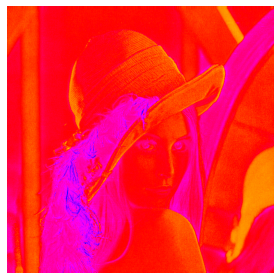

In [8]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)
s_max = 255
v_max = 255
lena_hsv[:, :, 1] = s_max
lena_hsv[:, :, 2] = v_max
lena_rgb = cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2RGB)
show_image(lena_rgb)

##### Задача 8 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

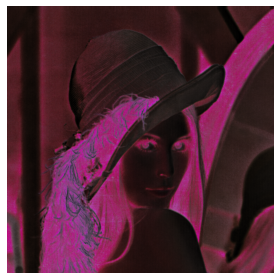

In [9]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)
lena_hsv[:, :, 2] = 255 - lena_hsv[:, :, 2]
lena_rgb = cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2RGB)
show_image(lena_rgb)

##### Задача 9 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b исходного изображения. Соберите коллаж $3 \times 2$ и отобразите его на экране. 

In [10]:
def grid(array, ncols=3):  # https://stackoverflow.com/questions/42040747/more-idiomatic-way-to-display-images-in-a-grid-with-numpy
    nindex, height, width, intensity = array.shape
    nrows = nindex//ncols
    return (array.reshape(nrows, ncols, height, width, intensity).swapaxes(1,2).reshape(height*nrows, width*ncols, intensity))

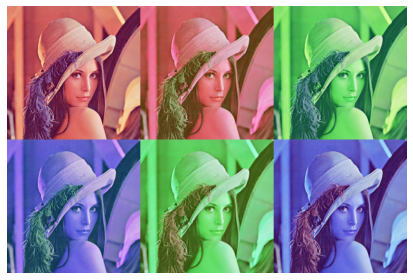

In [11]:
seqs = permutations([0, 1, 2])
imgs = np.array([lena[:, :, seq] for seq in seqs])
show_image(grid(imgs))

##### Задача 10 (3 балла)
Переведите изображение **lena** из RGB в CIE Lab при помощи встроенной функции OpenCV. Загрузите исходное иображение еще раз и переведите из RGB в CIE Lab самостоятельно с помощью формул (google it). Сравните полученные изображения, построив разницу между ними. (Должен получится ~0)

In [12]:
def gamma(img):
    out = img.copy()
    out = out / 255
    mask = out > 0.04045
    out[mask] = ((out[mask] + 0.055) / 1.055) ** 2.4
    out[~mask] = out[~mask] / 12.92
    return out

def rgb2xyz(img):
    M = np.array([
        [0.412453,  0.35758, 0.180423],
        [0.212671,  0.71516, 0.072169],
        [0.019334, 0.119193, 0.950227]
    ])
    return np.apply_along_axis(lambda x: M @ x, 2, img)

def xyz2lab(img, x_n = 0.950456, z_n = 1.088754):
    def f(t, delta = 0.008856):
        mask = t > delta
        t[mask] = t[mask] ** (1 / 3)
        t[~mask] = 7.787 * t[~mask] + 16 / 116
        return t

    y_mask = img[:, :, 1] > 0.008856
    L = np.zeros_like(img[:, :, 0])
    L[y_mask] = 116 * img[y_mask, 1] ** (1 / 3) - 16
    L[~y_mask] = 903.3 * img[~y_mask, 1]

    a = 500 * (f(img[:, :, 0] / x_n)  - f(img[:, :, 1]))
    b = 200 * (f(img[:, :, 1]) - f(img[:, :, 2] / z_n))

    out = img.copy()
    out[:, :, 0] = L * 2.55
    out[:, :, 1] = a + 128
    out[:, :, 2] = b + 128
    return out


In [13]:
lena = cv2.cvtColor(cv2.imread("lena.jpg"), cv2.COLOR_BGR2RGB)

In [14]:
lena_ = gamma(lena)
lena_xyz = rgb2xyz(lena_)
lena_lab = xyz2lab(lena_xyz)

lena_lab_cv = cv2.cvtColor(cv2.imread("lena.jpg"), cv2.COLOR_BGR2Lab)
# lena_lab_cv = cv2.cvtColor(lena, cv2.COLOR_RGB2Lab)

np.abs(lena_lab - lena_lab_cv)

array([[[2.65445525e-01, 3.52336737e-01, 3.65716265e+01],
        [2.65445525e-01, 3.52336737e-01, 3.65716265e+01],
        [2.06130381e-01, 3.62543817e-01, 3.69552411e+01],
        ...,
        [7.36718319e-02, 6.51793636e-02, 3.32824481e+01],
        [4.96250970e-01, 3.43675977e-02, 3.89809149e+01],
        [3.81396162e-01, 3.33867696e-01, 4.82490567e+01]],

       [[2.65445525e-01, 3.52336737e-01, 3.65716265e+01],
        [2.65445525e-01, 3.52336737e-01, 3.65716265e+01],
        [2.06130381e-01, 3.62543817e-01, 3.69552411e+01],
        ...,
        [7.36718319e-02, 6.51793636e-02, 3.32824481e+01],
        [4.96250970e-01, 3.43675977e-02, 3.89809149e+01],
        [3.81396162e-01, 3.33867696e-01, 4.82490567e+01]],

       [[2.65445525e-01, 3.52336737e-01, 3.65716265e+01],
        [2.65445525e-01, 3.52336737e-01, 3.65716265e+01],
        [2.06130381e-01, 3.62543817e-01, 3.69552411e+01],
        ...,
        [7.36718319e-02, 6.51793636e-02, 3.32824481e+01],
        [4.96250970e-01, 3.43